ASSIGNMENT-5

**CIFAR-10 Classification Model**

Neural network

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import tensorflow as tf

In [2]:
from keras.datasets import cifar10

In [3]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [5]:
data = ["Airplane","Car","Bird","Cat","Deer","Dog","Frog","Horse","Ship", "Truck"]

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
print(X_train.shape,X_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


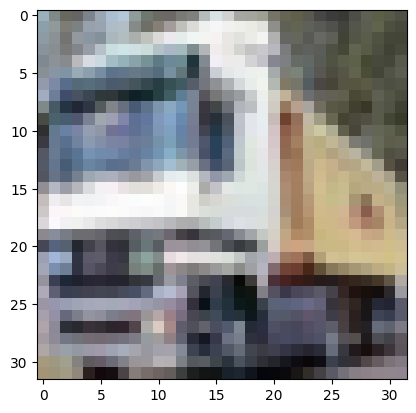

In [8]:
plt.imshow(X_train[1])

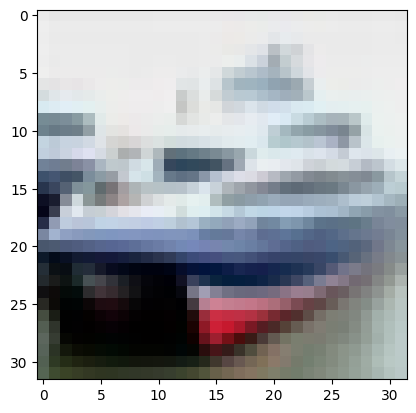

In [9]:


plt.imshow(X_test[1])

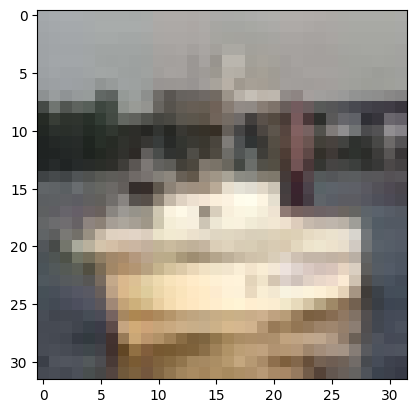

In [10]:
plt.imshow(X_train[216])

In [11]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))


In [12]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5,noise_shape=None,seed=None))
model.add(tf.keras.layers.Dense(units=128,activation='relu'))
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

In [14]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [16]:
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 213s 135ms/step - loss: 1.4453 - accuracy: 0.4790
Epoch 2/5
1563/1563 [==============================] - 201s 129ms/step - loss: 1.0512 - accuracy: 0.6235
Epoch 3/5
1563/1563 [==============================] - 199s 127ms/step - loss: 0.8837 - accuracy: 0.6870
Epoch 4/5
1563/1563 [==============================] - 194s 124ms/step - loss: 0.7850 - accuracy: 0.7212
Epoch 5/5
1563/1563 [==============================] - 189s 121ms/step - loss: 0.7167 - accuracy: 0.7483


ASSIGNMENT-6

**Text Classification using RNN**


In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import pandas as pd

In [22]:
consumer = pd.read_csv('/content/drive/MyDrive/connsumerComplaintsSmall.csv')

In [23]:
consumer.head()

Unnamed: 0 Date received  \
0           1    21-11-2022   
1           2    21-11-2022   
2           3    21-11-2022   
3           4    21-11-2022   
4           5    15-11-2022   

                                             Product  \
0                                           Mortgage   
1  Credit reporting, credit repair services, or o...   
2  Credit reporting, credit repair services, or o...   
3  Credit reporting, credit repair services, or o...   
4  Credit reporting, credit repair services, or o...   

                  Sub-product  \
0  Conventional home mortgage   
1            Credit reporting   
2            Credit reporting   
3            Credit reporting   
4            Credit reporting   

                                               Issue  \
0                         Struggling to pay mortgage   
1                        Improper use of your report   
2                        Improper use of your report   
3  Problem with a credit reporting company's inve...   
4               Incorrect information on your report   

                                           Sub-issue  \
0                                                NaN   
1      Reporting company used your report improperly   
2      Reporting company used your report improperly   
3  Their investigation did not fix an error on yo...   
4                Information belongs to someone else   

  Consumer complaint narrative  
0                          NaN  
1                          NaN  
2                          NaN  
3                          NaN  
4                          NaN

In [24]:
consumer.columns

Index(['Unnamed: 0', 'Date received', 'Product', 'Sub-product', 'Issue',
       'Sub-issue', 'Consumer complaint narrative'],
      dtype='object')

In [25]:
consumer.describe()

Unnamed: 0
count  101.000000
mean    51.000000
std     29.300171
min      1.000000
25%     26.000000
50%     51.000000
75%     76.000000
max    101.000000

In [26]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical

In [27]:
texts = consumer['Consumer complaint narrative'].fillna('')
labels = consumer['Product']

In [28]:
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
sequences_padded = pad_sequences(sequences, maxlen=max_len)

In [29]:
label_to_index = {label: index for index, label in enumerate(set(labels))}
labels_encoded = [label_to_index[label] for label in labels]
labels_categorical = to_categorical(labels_encoded)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(sequences_padded, labels_categorical, test_size=0.2, random_state=42)

In [31]:
model = Sequential()
model.add(Embedding(max_words, 64, input_length=max_len))
model.add(LSTM(64))
model.add(Dense(len(label_to_index), activation='softmax'))

In [32]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
2/2 [==============================] - 2s 498ms/step - loss: 1.9332 - accuracy: 0.1806 - val_loss: 1.8953 - val_accuracy: 0.6250
Epoch 2/10
2/2 [==============================] - 0s 67ms/step - loss: 1.8647 - accuracy: 0.8194 - val_loss: 1.8432 - val_accuracy: 0.6250
Epoch 3/10
2/2 [==============================] - 0s 64ms/step - loss: 1.7822 - accuracy: 0.8194 - val_loss: 1.7750 - val_accuracy: 0.6250
Epoch 4/10
2/2 [==============================] - 0s 74ms/step - loss: 1.6751 - accuracy: 0.8194 - val_loss: 1.6719 - val_accuracy: 0.6250
Epoch 5/10
2/2 [==============================] - 0s 80ms/step - loss: 1.5015 - accuracy: 0.8194 - val_loss: 1.5125 - val_accuracy: 0.6250
Epoch 6/10
2/2 [==============================] - 0s 67ms/step - loss: 1.1992 - accuracy: 0.8194 - val_loss: 1.4254 - val_accuracy: 0.6250
Epoch 7/10
2/2 [==============================] - 0s 68ms/step - loss: 0.8469 - accuracy: 0.8194 - val_loss: 1.6284 - val_accuracy: 0.6250
Epoch 8/10
2/2 [==========

In [34]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", accuracy)

1/1 [==============================] - 0s 30ms/step - loss: 1.2692 - accuracy: 0.7619
Test accuracy: 0.761904776096344


ASSIGNMENT-7

In [35]:
train_data = pd.read_csv('/content/drive/MyDrive/emotion-labels-train.csv')

In [36]:
test_data = pd.read_csv('/content/drive/MyDrive/emotion-labels-test.csv')

In [37]:
train_data.head()

text label
0  Just got back from seeing @GaryDelaney in Burs...   joy
1  Oh dear an evening of absolute hilarity I don'...   joy
2  Been waiting all week for this game ❤️❤️❤️ #ch...   joy
3  @gardiner_love : Thank you so much, Gloria! Yo...   joy
4  I feel so blessed to work with the family that...   joy

In [38]:
X_train = train_data['text']
y_train = train_data['label']
X_test = test_data['text']
y_test = test_data['label']

In [39]:
import numpy as np

In [40]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [41]:
emotions = set(y_train)
num_classes = len(emotions)
label_to_index = {label: index for index, label in enumerate(emotions)}


In [42]:
y_train = np.array([label_to_index[label] for label in y_train])
y_test = np.array([label_to_index[label] for label in y_test])

In [43]:
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_len)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_len)

In [44]:
model = Sequential()
model.add(Embedding(max_words, 64, input_length=max_len))
model.add(LSTM(64))
model.add(Dense(len(label_to_index), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [45]:
loss, accuracy = model.evaluate(X_test_padded, y_test)
print("Test accuracy:", accuracy)

99/99 [==============================] - 2s 12ms/step - loss: 1.3870 - accuracy: 0.2317
Test accuracy: 0.23169955611228943
